In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
datapoints = 50
x = np.linspace(-3, 3, datapoints)
x1 = np.array([])
x2 = np.array([])
y = np.array([])
for i in range(datapoints):
    for j in range(datapoints):
        x_1 = x[i]
        x_2 = x[j]
        x1 = np.append(x1, x_1)
        x2 = np.append(x2, x_2)
        a1 = 0.35
        a2 = -0.35
        y = np.append(y, a1*x_1 + a2*x_2)
x_data = np.array([x1, x2]).T
y_data = np.array([y + 0.1*np.random.normal(0,1, datapoints**2)]).T

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Dense(1, activation=None, input_shape=(2, )))

custom_adam = Adam(learning_rate=0.1, # step-size (can overshoot when too larger)
                   beta_1=0.9, 
                   beta_2=0.999, 
                   epsilon=0.00000001, 
                   decay=0.001, 
                   amsgrad=False)
model.compile(loss = 'mse', optimizer=custom_adam, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


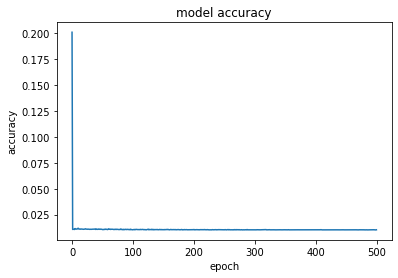

In [4]:
fit_history = model.fit(
    x_data, 
    y_data, 
    epochs=500, # how may times do we go through the entire dataset
    verbose=0 # set to '2' to print progress bar
)

plt.plot(fit_history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [6]:
y_model = model.predict(
    x_data, 
    batch_size=1, 
    verbose=0)

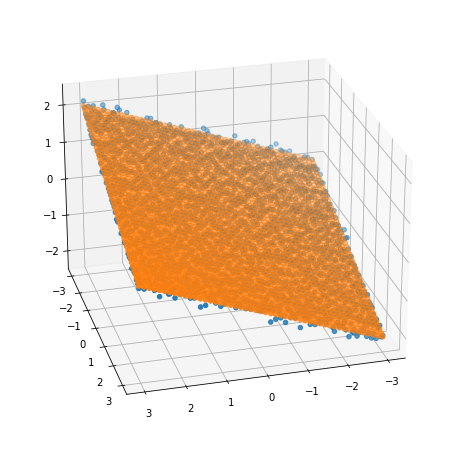

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
y_output = y_model.T[0]
ax.scatter3D(x1, x2, y_data);
ax.scatter3D(x1, x2, y_model);
ax.view_init(25, 75)